<a href="https://colab.research.google.com/github/Harini240/Harini240/blob/main/IMG_PANDA_OBJ_RECOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

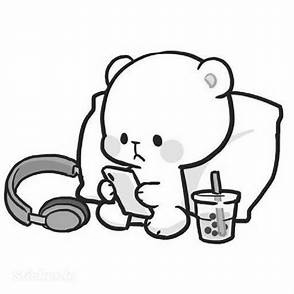

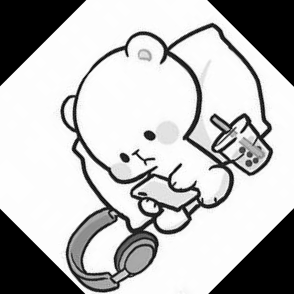

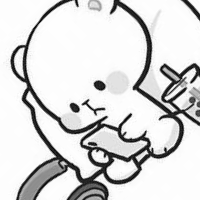

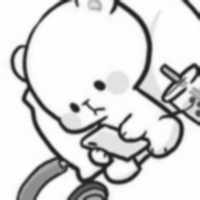

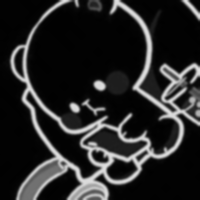

Height: 200, Width: 200
Sample pixel values (blurred): [253 253 253 253 253 253 253 253 253 253]


In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image_path = "/content/OIP.jpg"  # Ensure the path is correct for your environment
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Image not found or unable to load. Check the file path and ensure the image is not corrupted.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)  # Use cv2_imshow in Colab
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotate the image
angle = 45
(h, w) = gray_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))
cv2_imshow(rotated_image)  # Use cv2_imshow in Colab
cv2.waitKey(0)
cv2.destroyAllWindows()

# Crop the image
x, y, crop_w, crop_h = 50, 50, 200, 200
if y + crop_h <= rotated_image.shape[0] and x + crop_w <= rotated_image.shape[1]:
    cropped_image = rotated_image[y:y+crop_h, x:x+crop_w]
else:
    cropped_image = rotated_image  # Fallback to the full image if crop dimensions exceed image dimensions
cv2_imshow(cropped_image)  # Use cv2_imshow in Colab
cv2.waitKey(0)
cv2.destroyAllWindows()

# Blur the image
blurred_image = cv2.GaussianBlur(cropped_image, (5, 5), 0)
cv2_imshow(blurred_image)  # Use cv2_imshow in Colab
cv2.waitKey(0)
cv2.destroyAllWindows()

# Convert to negative image
negative_image = cv2.bitwise_not(blurred_image)
cv2_imshow(negative_image)  # Use cv2_imshow in Colab
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save images
cv2.imwrite("/content/grayscale_image.jpg", gray_image)
cv2.imwrite("/content/rotated_image.jpg", rotated_image)
cv2.imwrite("/content/cropped_image.jpg", cropped_image)
cv2.imwrite("/content/blurred_image.jpg", blurred_image)
cv2.imwrite("/content/negative_image.jpg", negative_image)

# Print height, width, and sample pixel values
height, width = blurred_image.shape
pixel_values = blurred_image.flatten()
print(f"Height: {height}, Width: {width}")
print(f"Sample pixel values (blurred): {pixel_values[:10]}")
